Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

Questions To Be Answered



*   What are the most popular movies
*   What are the most popular movies according to season
*   What Genre do most persons love
*   What studio makes the best movies





Gather and Inspect Data

In [ ]:
df = pd.read_csv("AnimeWorld.csv")
df.head()

,Unnamed: 0,Anime,Genre,Description,Studio,Year,Rating
0,0,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,"['Drama', 'Fantasy', 'Suspense']",A reunion that was supposed to spell the arriv...,White Fox,"Jul 8, 2020",8.37
1,1,"Kanojo, Okarishimasu","['Comedy', 'Romance']",Kazuya Kinoshita is a 20-year-old college stud...,TMS Entertainment,"Jul 11, 2020",NaN
2,2,The God of High School,"['Action', 'Fantasy', 'Sci-Fi', 'Supernatural']","The ""God of High School"" tournament has begun,...",MAPPA,"Jul 6, 2020",NaN
3,3,Maou Gakuin no Futekigousha: Shijou Saikyou no...,"['Action', 'Fantasy']","In the distant past, a war between humans and ...",SILVER LINK.,"Jul 4, 2020",NaN
4,4,Enen no Shouboutai: Ni no Shou,"['Action', 'Supernatural']",After his confrontation in the Nether with his...,David Production,"Jul 4, 2020",NaN


In [ ]:
# Check data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1005 non-null   int64  
 1   Anime        1005 non-null   object 
 2   Genre        1005 non-null   object 
 3   Description  1005 non-null   object 
 4   Studio       977 non-null    object 
 5   Year         1005 non-null   object 
 6   Rating       97 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 55.1+ KB


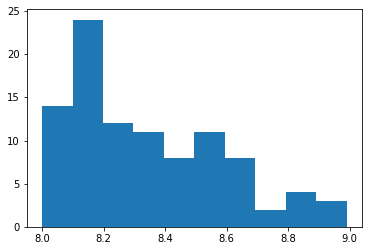

In [ ]:
# Inspect the distribution of the rating column
plt.hist(df.Rating);

In [ ]:
df.Studio.value_counts()

A-1 Pictures         38
J.C.Staff            35
Studio Deen          31
OLM                  29
TMS Entertainment    27
                     ..
Maho Film             1
Animation Planet      1
Shimogumi             1
Studio VOLN           1
Gainax                1
Name: Studio, Length: 209, dtype: int64

In [ ]:
df.Genre.value_counts()[:15]

Comedy                                107
['Comedy', 'Slice of Life']            96
Slice of Life                          43
[]                                     36
['Action', 'Adventure', 'Fantasy']     31
Sports                                 30
['Action', 'Sci-Fi']                   28
Action                                 27
['Action', 'Fantasy']                  21
['Comedy', 'Romance']                  20
['Comedy', 'Supernatural']             17
['Comedy', 'Fantasy']                  14
Drama                                  13
Fantasy                                12
['Adventure', 'Fantasy']               11
Name: Genre, dtype: int64

Wrangle Data

In [ ]:
# Drop unwanted column
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Anime,Genre,Description,Studio,Year,Rating
0,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,"['Drama', 'Fantasy', 'Suspense']",A reunion that was supposed to spell the arriv...,White Fox,"Jul 8, 2020",8.37
1,"Kanojo, Okarishimasu","['Comedy', 'Romance']",Kazuya Kinoshita is a 20-year-old college stud...,TMS Entertainment,"Jul 11, 2020",NaN
2,The God of High School,"['Action', 'Fantasy', 'Sci-Fi', 'Supernatural']","The ""God of High School"" tournament has begun,...",MAPPA,"Jul 6, 2020",NaN
3,Maou Gakuin no Futekigousha: Shijou Saikyou no...,"['Action', 'Fantasy']","In the distant past, a war between humans and ...",SILVER LINK.,"Jul 4, 2020",NaN
4,Enen no Shouboutai: Ni no Shou,"['Action', 'Supernatural']",After his confrontation in the Nether with his...,David Production,"Jul 4, 2020",NaN


In [ ]:
# Convert Year column from Object to Datetime Format
df['Year'] = pd.to_datetime(df['Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Anime        1005 non-null   object        
 1   Genre        1005 non-null   object        
 2   Description  1005 non-null   object        
 3   Studio       977 non-null    object        
 4   Year         1005 non-null   datetime64[ns]
 5   Rating       97 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.2+ KB


In [ ]:
df.Year.head()

0   2020-07-08
1   2020-07-11
2   2020-07-06
3   2020-07-04
4   2020-07-04
Name: Year, dtype: datetime64[ns]

In [ ]:
# Replace empty list strings with NaN
df['Genre'] = df['Genre'].replace('[]', np.nan) 
df[df['Genre'] == '[]']

,Anime,Genre,Description,Studio,Year,Rating


In [ ]:
def season_func(year):
  month = int(datetime.strftime(year, '%m'))
  if month in [12, 1, 2]:
    return "Winter"
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Summer'
  return 'Autumn'

df['Season'] = df.Year.apply(season_func)
df.head()

,Anime,Genre,Description,Studio,Year,Rating,Season
0,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,"['Drama', 'Fantasy', 'Suspense']",A reunion that was supposed to spell the arriv...,White Fox,2020-07-08,8.37,Summer
1,"Kanojo, Okarishimasu","['Comedy', 'Romance']",Kazuya Kinoshita is a 20-year-old college stud...,TMS Entertainment,2020-07-11,NaN,Summer
2,The God of High School,"['Action', 'Fantasy', 'Sci-Fi', 'Supernatural']","The ""God of High School"" tournament has begun,...",MAPPA,2020-07-06,NaN,Summer
3,Maou Gakuin no Futekigousha: Shijou Saikyou no...,"['Action', 'Fantasy']","In the distant past, a war between humans and ...",SILVER LINK.,2020-07-04,NaN,Summer
4,Enen no Shouboutai: Ni no Shou,"['Action', 'Supernatural']",After his confrontation in the Nether with his...,David Production,2020-07-04,NaN,Summer


In [ ]:
df.sample(10)

,Anime,Genre,Description,Studio,Year,Rating,Season
723,Cardfight!! Vanguard G: GIRS Crisis-hen,Action,The first half of the second season of Cardfig...,TMS Entertainment,2015-10-11,NaN,Autumn
401,Angolmois: Genkou Kassenki,"['Action', 'Drama']",The scary great king comes from the other side...,NAZ,2018-07-11,NaN,Summer
68,Gleipnir,"['Action', 'Mystery', 'Supernatural', 'Ecchi']",Shuuichi Kagaya is what one would consider an ...,Pine Jam,2020-04-05,NaN,Spring
918,Gangsta.,"['Action', 'Drama']","Nicholas Brown and Worick Arcangelo, known in ...",Manglobe,2015-07-02,NaN,Summer
94,A3! Season Spring & Summer,"['Drama', 'Slice of Life']",Home to countless street acts and performances...,P.A. Works,2020-01-14,NaN,Winter
311,Gakuen Babysitters,"['Comedy', 'Slice of Life']",After losing both parents in a fatal plane cra...,Brain's Base,2018-01-07,NaN,Winter
286,Shoumetsu Toshi,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","One day, a city suddenly disappears. Takuya, a...",Madhouse,2019-04-07,NaN,Spring
816,High School Fleet,Action,A hundred years after catastrophic shifts in t...,Production IMS,2016-04-10,NaN,Spring
608,Catchy-kun no Nice Catch!,Comedy,(No synopsis yet.),DLE,2017-07-07,NaN,Summer
519,Schoolgirl Strikers: Animation Channel,"['Action', 'Sci-Fi']",It's the near future. The newly established gi...,J.C.Staff,2017-01-07,NaN,Winter


Analyze and Visualize Data

Question 1: What are the top 10 anime best movies 

In [ ]:
# subset dataframe to contain the top ten Animes
df1 = df[['Anime', 'Rating']].sort_values('Rating', ascending=False)[:10]

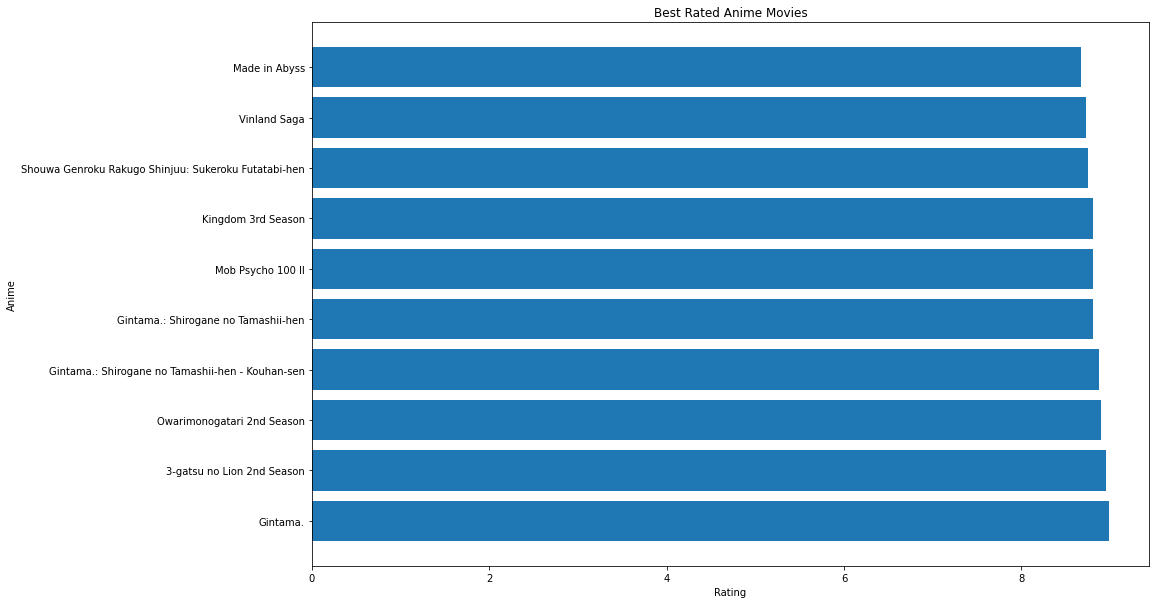

In [ ]:
# Create a bar plot of movies
def create_bar_plot(dataframe, y, width):
  """
  Description: This function plots a horizontal bar chart
  Input: Provide a pandas dataframe, the column to be plotted and its height
  Output: Returns a plotted bar chart
  """
  plt.figure(figsize=(15,10))
  plt.barh(y=dataframe[y], width=dataframe[width])
  plt.xlabel("Rating")
  plt.ylabel("Anime")
  plt.title('Best Rated Anime Movies')
  plt.show()
create_bar_plot(df1, 'Anime', 'Rating')

Question 2: What are the best movies to watch for each season

Winter

In [ ]:
# Subset to winter only rows
df_winter = df[df['Season'] == 'Winter']

In [ ]:
df1_winter = df_winter[['Anime', 'Rating']].sort_values('Rating', ascending=False)[:10]

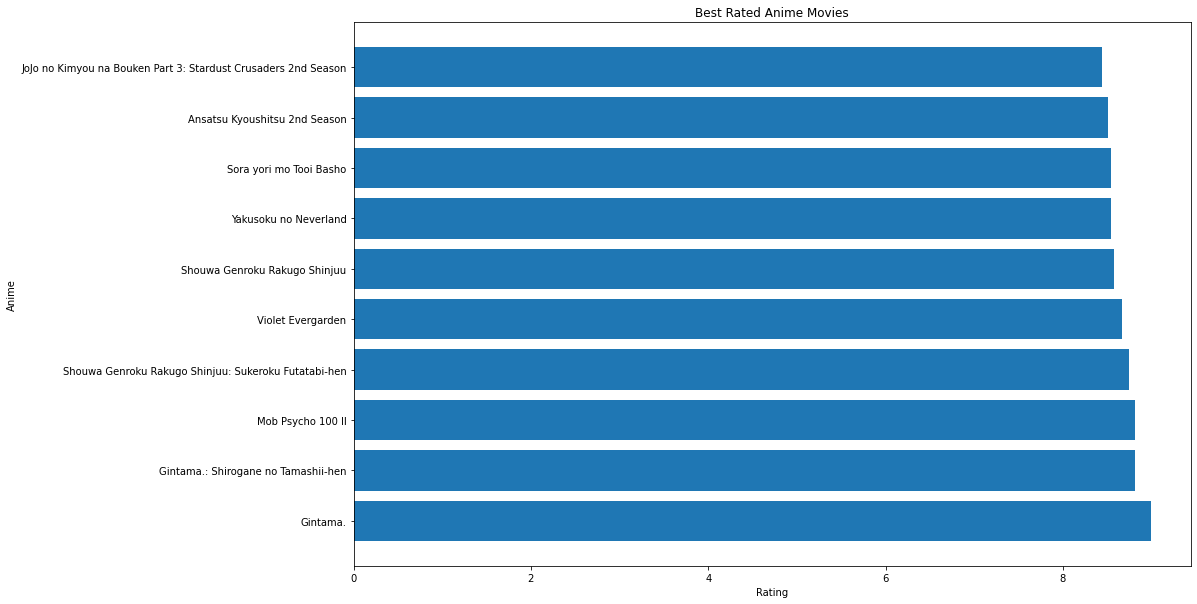

In [ ]:
# Plot bar chart 
create_bar_plot(df1_winter, 'Anime', 'Rating')

Spring

In [ ]:
# Subset to spring only rows
df_spring = df[df['Season'] == 'Spring']

In [ ]:
df1_spring = df_spring[['Anime', 'Rating']].sort_values('Rating', ascending=False)[:10]

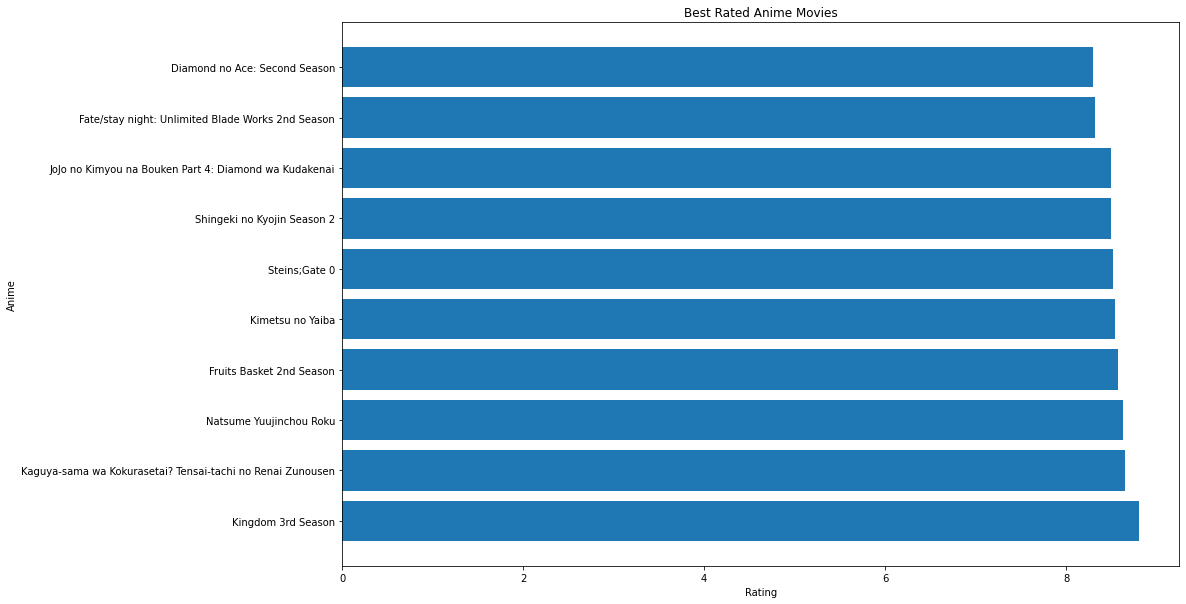

In [ ]:
# Plot bar chart 
create_bar_plot(df1_spring, 'Anime', 'Rating')

Summer

In [ ]:
# Subset to summer only rows
df_summer = df[df['Season'] == 'Summer']

In [ ]:
df1_summer = df_summer[['Anime', 'Rating']].sort_values('Rating', ascending=False)[:10]

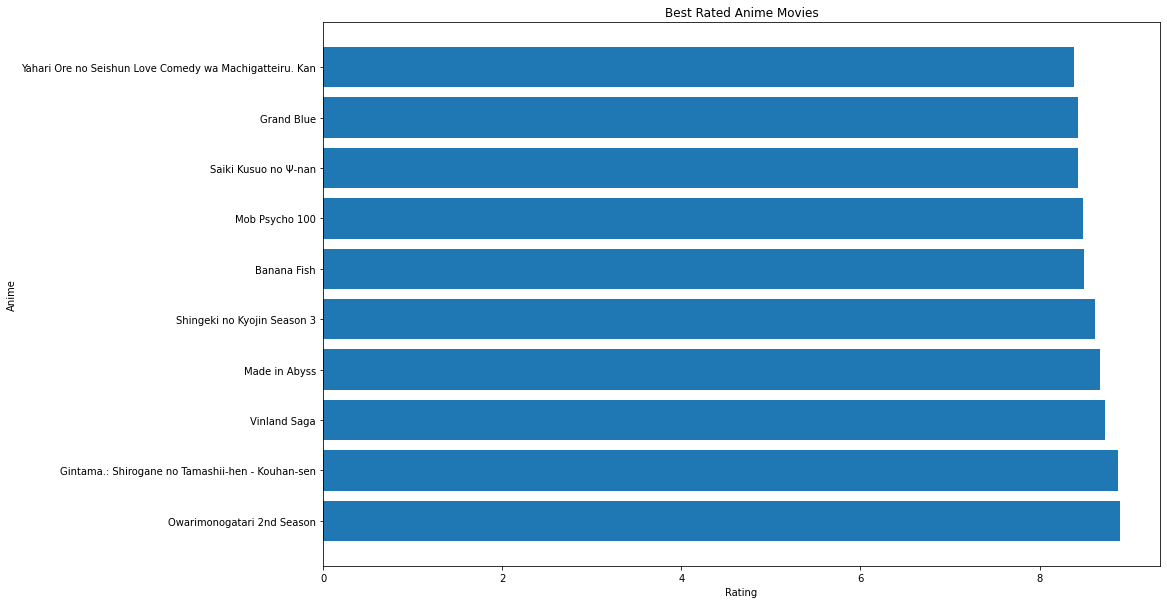

In [ ]:
# Plot bar chart 
create_bar_plot(df1_summer, 'Anime', 'Rating')

Autumn

In [ ]:
# Subset to summer only rows
df_autumn = df[df['Season'] == 'Autumn']

In [ ]:
df1_autumn = df_autumn[['Anime', 'Rating']].sort_values('Rating', ascending=False)[:10]

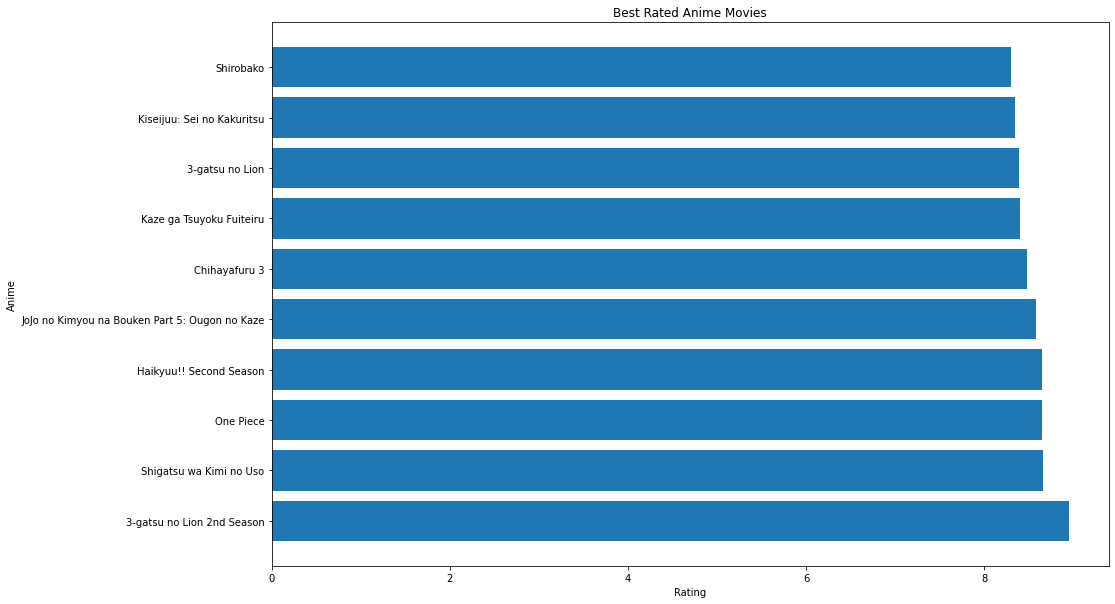

In [ ]:
# Plot bar chart 
create_bar_plot(df1_autumn, 'Anime', 'Rating')

Question: What Genre do most anime watchers love?

In [ ]:
# Sum anime ratings according to genre
df2_genre_rating = df.groupby('Genre').agg({"Rating":'sum'})

# Count the number of anime movies according to genre
df2_genre_count = df.groupby('Genre').agg({"Rating":'count'})

# Calculate the average movie rating by genre
df2_genre = (df2_genre_rating / df2_genre_count).sort_values('Rating', ascending=False)[:5]
df2_genre

,Rating
Genre,
"['Comedy', 'Mystery', 'Supernatural']",8.900000
"['Action', 'Comedy', 'Sci-Fi']",8.893333
"['Drama', 'Slice of Life']",8.670000
"['Drama', 'Fantasy', 'Slice of Life']",8.670000
"['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi']",8.670000


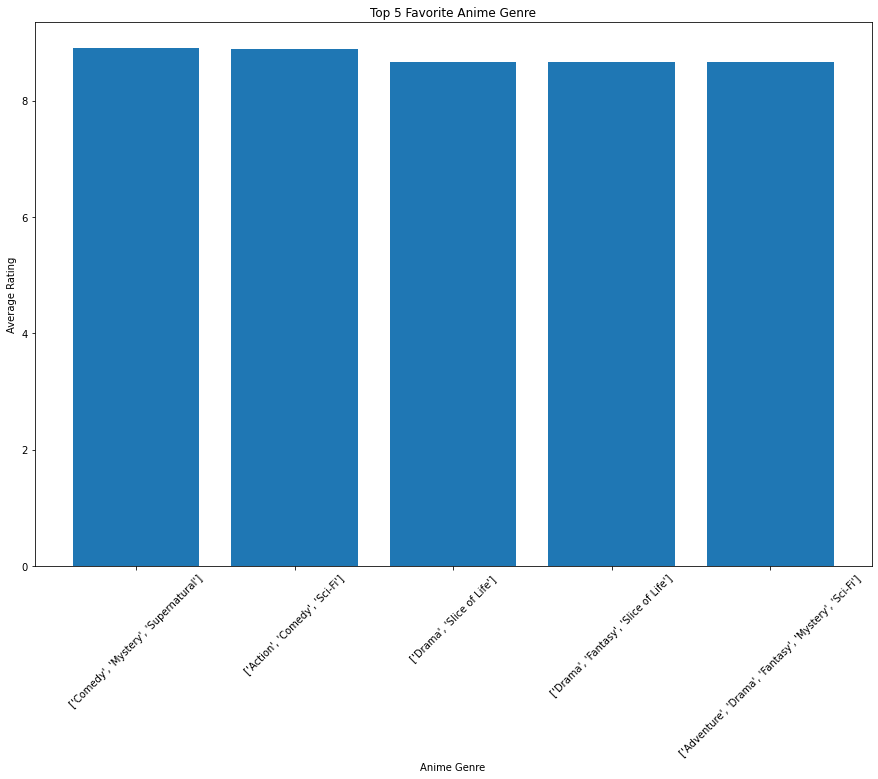

In [ ]:
# Plot bar chart
plt.figure(figsize=(15,10))
plt.bar(x=df2_genre.index, height=df2_genre.Rating)
plt.xlabel("Anime Genre")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.title('Top 5 Favorite Anime Genre')
plt.show()

In [ ]:
df[df['Genre']=="['Comedy', 'Mystery', 'Supernatural']"]

,Anime,Genre,Description,Studio,Year,Rating,Season
571,Owarimonogatari 2nd Season,"['Comedy', 'Mystery', 'Supernatural']",Following an encounter with oddity specialist ...,Shaft,2017-08-12,8.9,Summer
999,Vampire Holmes,"['Comedy', 'Mystery', 'Supernatural']",The great detective Holmes does not solve myst...,Studio! Cucuri,2015-04-04,NaN,Spring


Question 4: Which Movie Studio Produces The Best Movie

In [ ]:
# Sum anime ratings according to studio
df2_studio_rating = df.groupby('Studio').agg({"Rating":'sum'})

# Count the number of anime produced by each studio
df2_studio_count = df.groupby('Studio').agg({"Rating":'count'})

# Calculate the average rating each studio gets per anime
df2_studio = (df2_studio_rating / df2_studio_count).sort_values('Rating', ascending=False)[:5]
df2_studio

,Rating
Studio,
Bandai Namco Pictures,8.893333
Shaft,8.746667
Toei Animation,8.650000
CloverWorks,8.540000
A-1 Pictures,8.510000


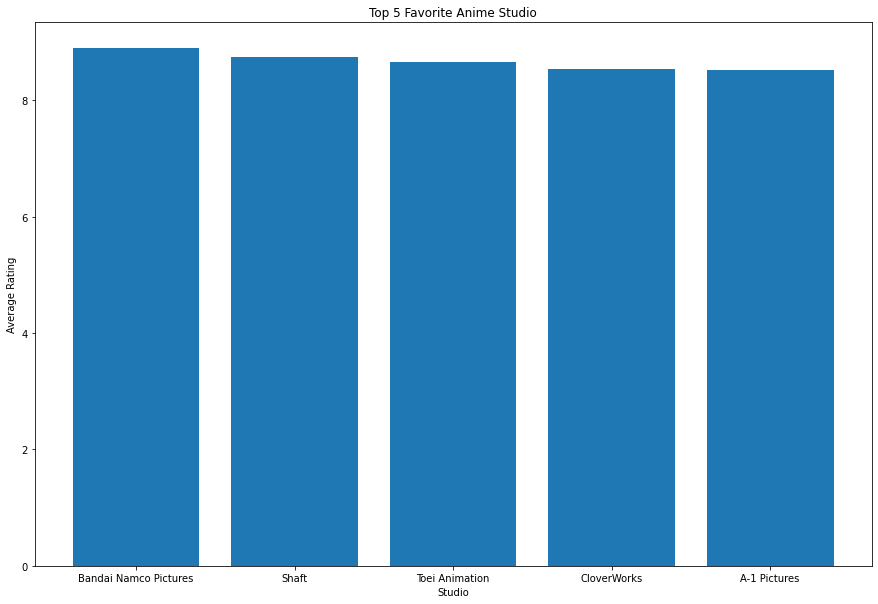

In [ ]:
# Plot bar chart
plt.figure(figsize=(15,10))
plt.bar(x=df2_studio.index, height=df2_studio.Rating)
plt.xlabel("Studio")
plt.ylabel("Average Rating")
plt.title('Top 5 Favorite Anime Studio')
plt.show()